In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [123]:
data = pd.read_csv('SeoulBikeData.csv')
print(data.shape)
data['Datetime'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') + pd.to_timedelta(data['Hour'], unit = 'h')
data[['Seasons', 'Holiday', 'Functioning Day']] = data[['Seasons', 'Holiday', 'Functioning Day']].astype('category')
data = data.set_index('Datetime')
data = data.drop(columns = ['Date', 'Hour'])
print(data.index)
print(data.dtypes)
data.head(10)

(8760, 14)
DatetimeIndex(['2017-12-01 00:00:00', '2017-12-01 01:00:00',
               '2017-12-01 02:00:00', '2017-12-01 03:00:00',
               '2017-12-01 04:00:00', '2017-12-01 05:00:00',
               '2017-12-01 06:00:00', '2017-12-01 07:00:00',
               '2017-12-01 08:00:00', '2017-12-01 09:00:00',
               ...
               '2018-11-30 14:00:00', '2018-11-30 15:00:00',
               '2018-11-30 16:00:00', '2018-11-30 17:00:00',
               '2018-11-30 18:00:00', '2018-11-30 19:00:00',
               '2018-11-30 20:00:00', '2018-11-30 21:00:00',
               '2018-11-30 22:00:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=8760, freq=None)
Rented Bike Count              int64
Temperature(C)               float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(C)     float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)         

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 05:00:00,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 06:00:00,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 07:00:00,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 08:00:00,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes


In [124]:
print(max(data.index))
print(min(data.index))
print(min(data['Rented Bike Count']))
print(max(data['Rented Bike Count']))
print(data['Seasons'].unique())
print(data['Holiday'].unique())
print(data['Functioning Day'].unique())

2018-11-30 23:00:00
2017-12-01 00:00:00
0
3556
['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']
['No Holiday', 'Holiday']
Categories (2, object): ['Holiday', 'No Holiday']
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


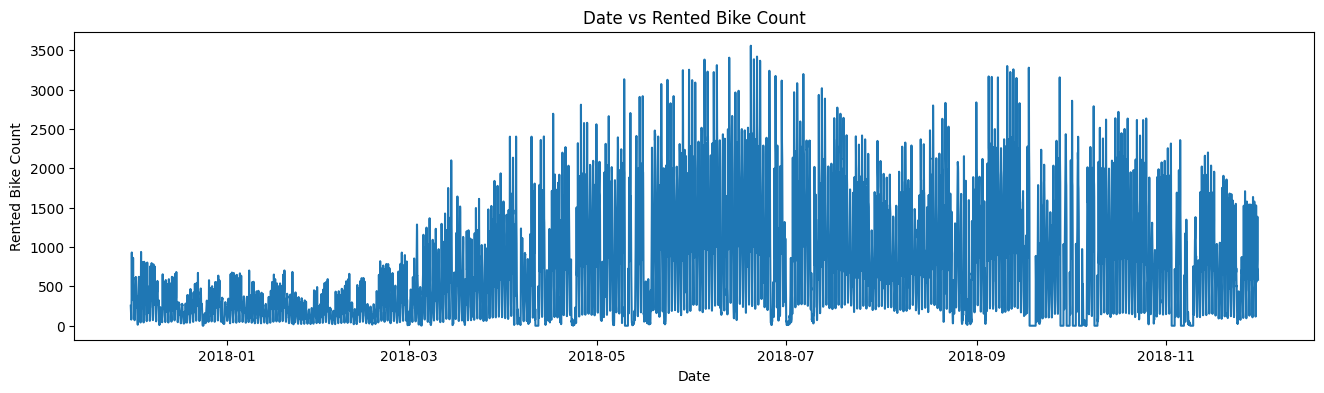

In [125]:
plt.figure(figsize = (16, 4))
plt.plot(data['Rented Bike Count'])
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.title('Date vs Rented Bike Count')
plt.show()

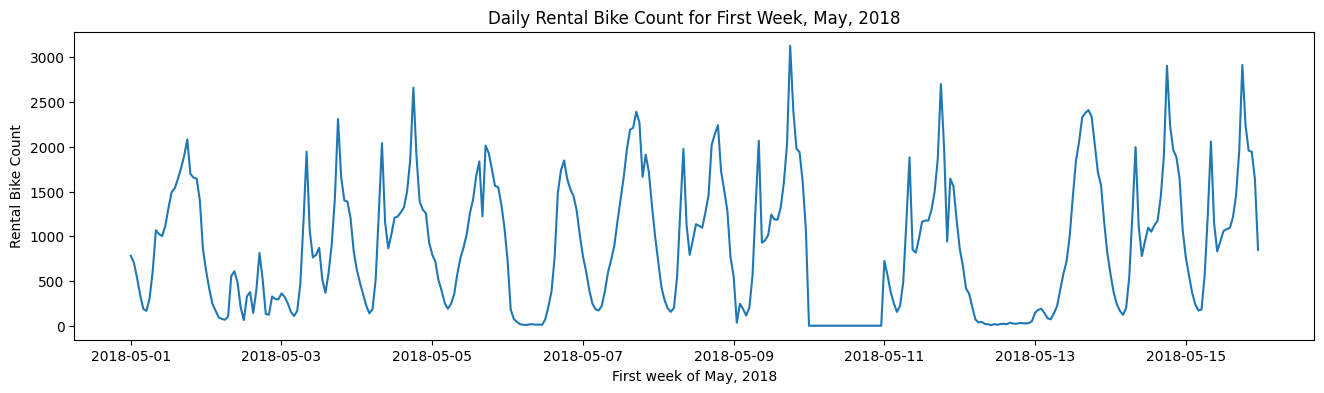

In [126]:
plt.figure(figsize = (16, 4))
plt.plot(data.loc['2018-05-01':'2018-05-15', 'Rented Bike Count'])
plt.xlabel('First week of May, 2018')
plt.ylabel('Rental Bike Count')
plt.title('Daily Rental Bike Count for First Week, May, 2018')
plt.show()

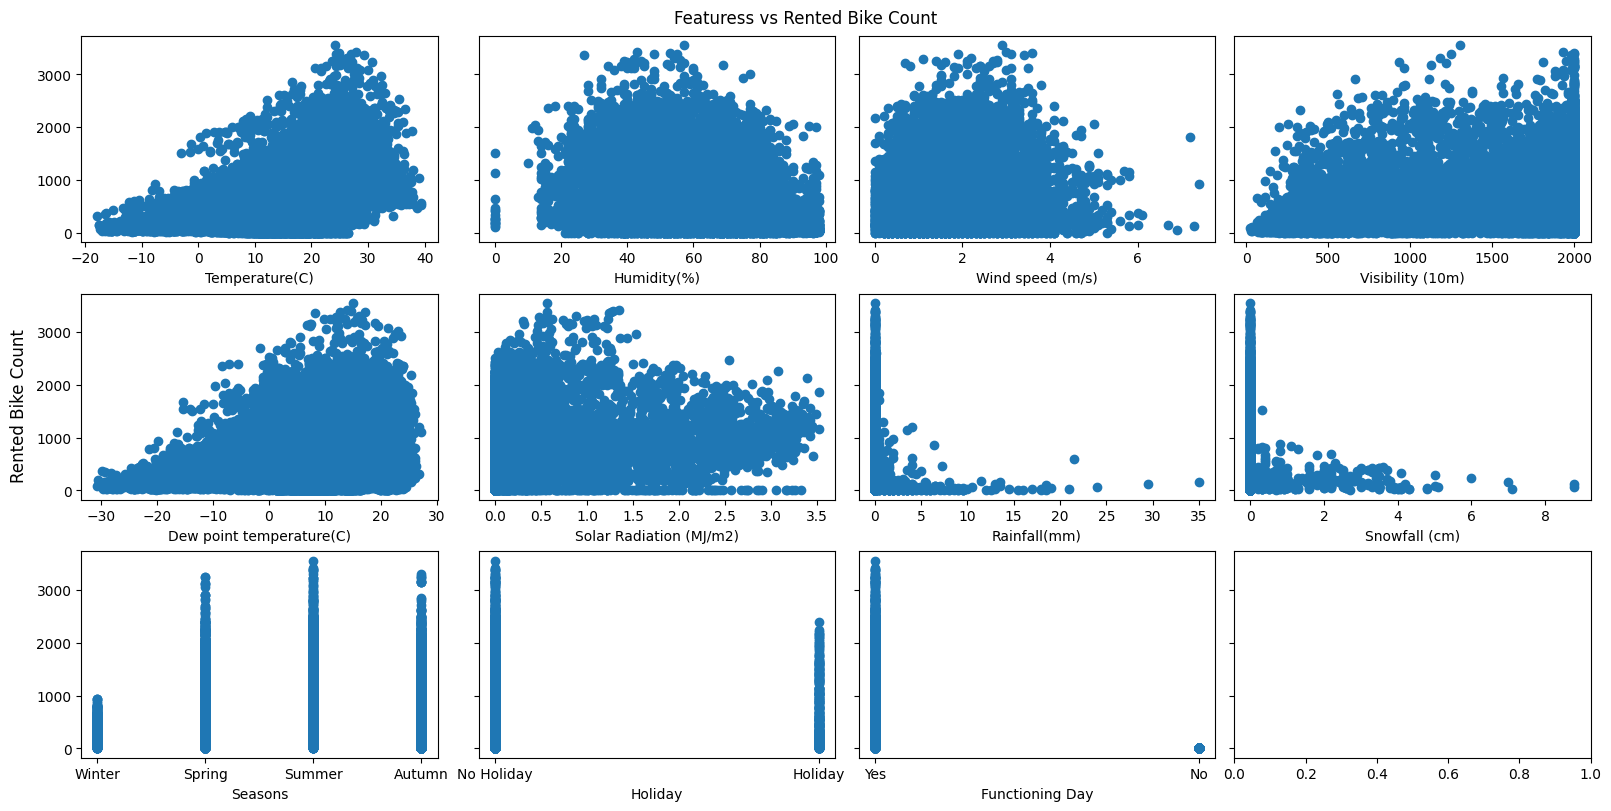

In [127]:
target = 'Rented Bike Count'
features = [ x for x in data.columns if x != target ]
rows, columns = 3, 4
fig, ax = plt.subplots(nrows = rows, ncols = columns, figsize = (16, 8), layout = 'constrained', sharey = True)
f = 0
for i in range(rows):
  for j in range(columns):
    if(f < len(features)):
      ax[i, j].scatter(data[features[f]], data[target])
      ax[i, j].set_xlabel(f'{features[f]}')
      f+=1
fig.supylabel(target)
fig.suptitle(f'Featuress vs {target}')
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


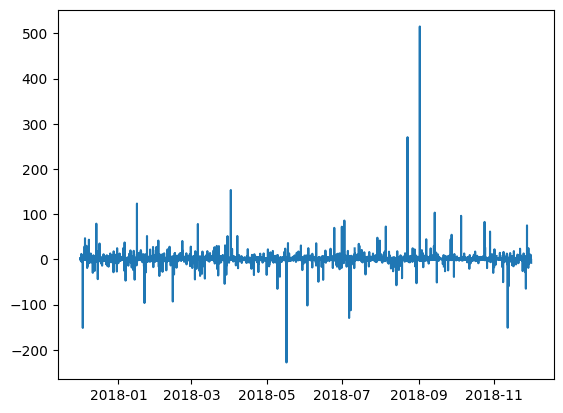

In [128]:
def get_trend(values):
  pass
values = pd.DataFrame(data[target])
values = values.rename(columns = {target:'u(t)'})
values['u(t-1)'] = values['u(t)'].shift(periods = 1)
values['u(t-2)'] = values['u(t-1)'].shift(periods = 1)

values = values.dropna()
values['log_u(t)'] = np.log(values['u(t)'])
values['log_u(t-1)'] = np.log(values['u(t-1)'])
values['log_u(t-2)'] = np.log(values['u(t-2)'])
values['d_log_u(t)'] = values['log_u(t)'] - values['log_u(t-1)']
values['d_log_u(t-1)'] = values['log_u(t-1)'] - values['log_u(t-2)']
values['ratio'] = values['d_log_u(t)'] / values['d_log_u(t-1)']

plt.plot(values['ratio'])